In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import statsmodels.api


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree   
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
dt_prin = pd.read_csv("./data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
dt_prin

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
dt= dt_prin.copy()
dt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<h1>PRETRAITEMENT DES DONNEES</h1>

In [4]:
dt.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
dt.duplicated().sum()

0

In [6]:
dt.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
dt.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
dt.shape

(1470, 35)

In [9]:
dt['HourlyRate']

0       94
1       61
2       92
3       56
4       40
        ..
1465    41
1466    42
1467    87
1468    63
1469    82
Name: HourlyRate, Length: 1470, dtype: int64

<h1>COMPREHENSION ET DESCRIPTION DE CHAQUE VARIABLE</h1>
<p>
<strong>Age :</strong> Represente l'age de chaque employé</br>
    
<strong>Attrition:</strong> Represente si l'employé a demissionné ou non</br>
    
<strong>BusinessTravel   :</strong> Represente les voyages entrepris à des fins professionnelles </br>
    
<strong>DailyRate  :</strong> Represente le montant prescrit du salaire pour un emploi donné de travail payé à la journée ou à l’heure.</br>
    
<strong>Department :</strong> Represente le departement dans le quel l'employé ce trouve</br>
    
<strong>DistanceFromHome :</strong> Represente la distance entre la maison et le travail</br>
    
<strong>Education:</strong> Represente le niveau d'eduction (diplome)</br>
    
<strong>EducationField:</strong> Represente le domaine de l'education(diplome)</br>
    
<strong>EmployeeCount :</strong> Represente le nombre d'employé</br>
    
<strong>EmployeeNumber:</strong> Represente le numero de l'employé</br>
    
<strong>EnvironmentSatisfaction:</strong> Represente la satisfaction de l'employé dans l'environnement ou il travail</br>
    
<strong>Gender:</strong> Represente le sexe de l'employé</br>
    
<strong>HourlyRate:</strong> Represente le montant d’argent qui est facturé, payé ou gagné pour chaque heure travaillée</br>
    
<strong>JobInvolvement:</strong> Represente l'implication dans le poste qu'il occupe</br>
    
<strong>JobLevel :</strong> Represente le niveau de responsabilité et les attentes des rôles au sein de votre organisation. </br>
    
<strong>JobRole :</strong> Represente les tâches générales, ou d’autres tâches connexes, et les responsabilités d’un poste.</br>
    
<strong>JobSatisfaction :</strong> Represente la satisfaction du job qu'il occupe</br>
    
<strong>MaritalStatus:</strong> Represente si il est marié ou pas</br>
    
<strong>MonthlyIncome:</strong> Represente le revenu dénombrable brut reçu ou projeté à recevoir au cours du mois ou l’équivalent mensuel.</br>
    
<strong>MonthlyRate  :</strong> Represente le montant des intérêts qui vous seraient facturés au cours d’un mois.</br>
    
<strong>NumCompaniesWorked :</strong> Represente le nombre d'entreprise avec qui il a travaillé</br>
     
<strong>Over18  :</strong> Represente les employé ayant plus de 18 ans</br>
    
<strong>OverTime :</strong> Represente les heurs supplementaire</br>
    
<strong>PercentSalaryHike  :</strong> Represente l'Augmentation de salaire en pourcentage</br>
    
<strong>PerformanceRating  :</strong> Represente l'évaluation des performances</br>
    
<strong>RelationshipSatisfaction :</strong> Represente la satisfaction des relation</br>
    
<strong>StandardHours    :</strong> Represente l'heure standars</br>
 
<strong>StockOptionLevel :</strong> Represente le niveau des options d'achat d'actions</br>
    
<strong>TotalWorkingYears:</strong> Represente le total des années de travail</br>
    
<strong>TrainingTimesLastYear:</strong> Represente le Temps d'entraînement l'année dernière</br>
    
<strong>WorkLifeBalance:</strong> Represente L'équilibre travail-vie</br>
    
<strong>YearsAtCompany :</strong> Represente les années faites dans l'entreprise</br>
    
<strong>YearsInCurrentRole:</strong> Represente les années dans le rôle actuel</br>
    
<strong>YearsSinceLastPromotion:</strong> Represente les années depuis la dernière promotion</br>
    
<strong>YearsWithCurrManager:</strong> Represente les Années avec le gestionnaire actuel</br>

</p>

<h3>SUPPRESSION DES VARIABLE UNITLE<h3>

In [10]:
dt.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1,inplace=True)
dt.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [11]:
dt_num = dt.select_dtypes(np.number)
dt_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


<h1>VISUALISATION DES DONNEES<h1>

In [12]:
dt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


<AxesSubplot:xlabel='Attrition', ylabel='count'>

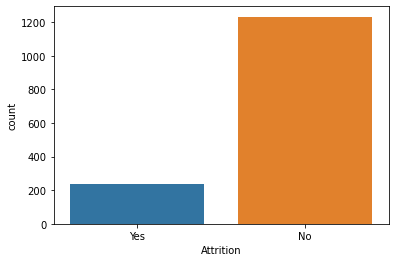

In [13]:
sns.countplot(x='Attrition',data=dt)

<p>On constate qu'il y a plus d'invidu qui non pas demissionnée que d'individu qui ont demissionnée</p>

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

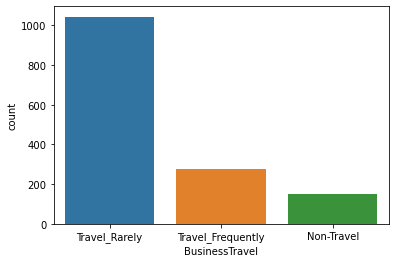

In [14]:
sns.countplot(x='BusinessTravel',data=dt)

<p>On constate qu'il y a plus d'employé qui voyage rarement que d'employé qui voyage frequament et ne voyage pas</p>

<AxesSubplot:xlabel='Department', ylabel='count'>

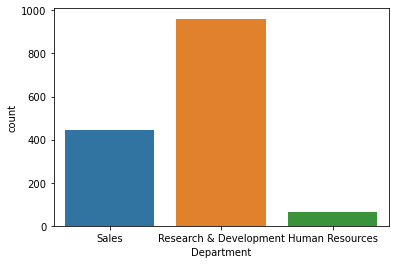

In [15]:
sns.countplot(x='Department',data=dt)

<p>On constate qu'il y a plus d'employé dans research & developpement departement que dans le sales et human resources</p>

<AxesSubplot:xlabel='EducationField', ylabel='count'>

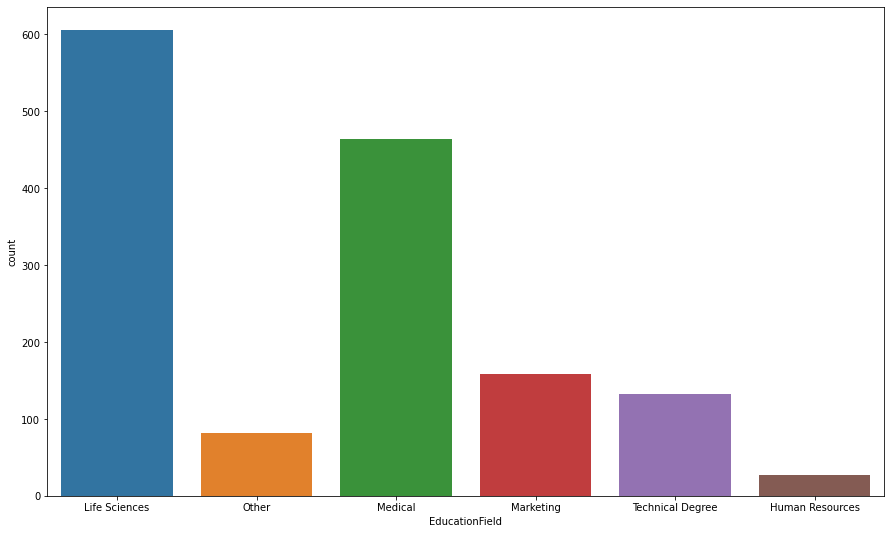

In [16]:
plt.figure(figsize=(15,9))

sns.countplot(x='EducationField',data=dt)

<p>On constate qu'il y a plus d'employé dans le domaine d'eduction de life science que dans le domaine de la medecin , makerting , resources humaine,diplôme technique et autre</p>

<AxesSubplot:xlabel='Gender', ylabel='count'>

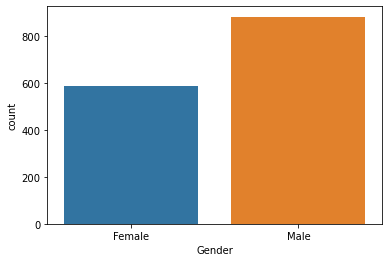

In [17]:
sns.countplot(x='Gender', data=dt)

<p>On constate qu'il y a plus d'employé de sexe masculin que feminin</p>

<AxesSubplot:xlabel='JobRole', ylabel='count'>

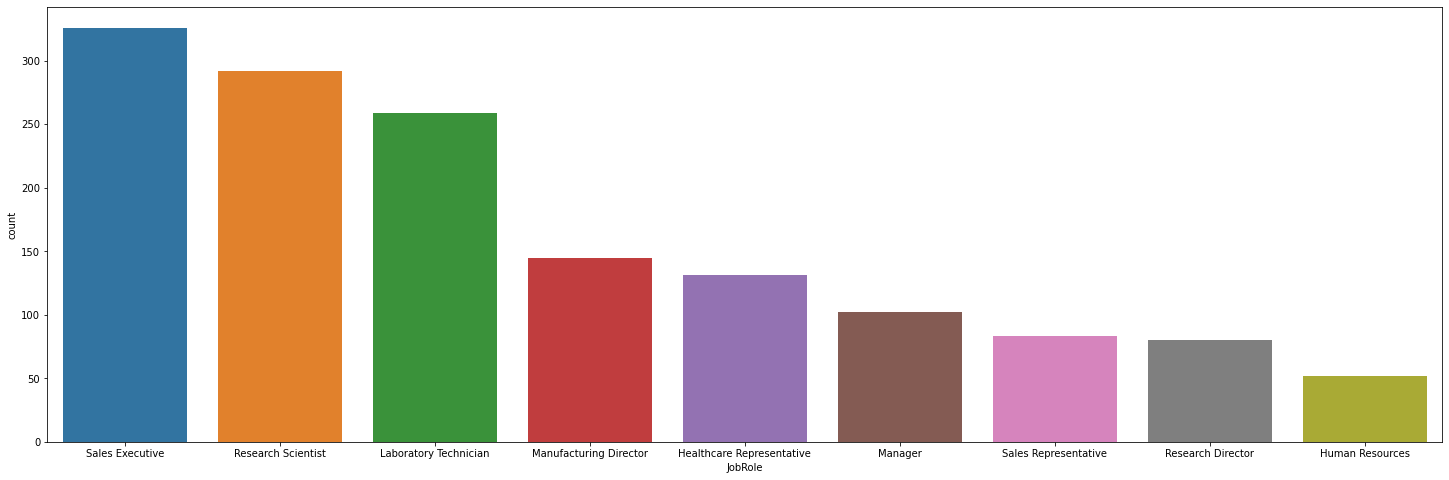

In [18]:
plt.figure(figsize=(25,8))

sns.countplot(x='JobRole', data=dt)

<p>On constate qu'il y a plus d'employé qui travail en tant que sales executive que dans les autres domaines</p>

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

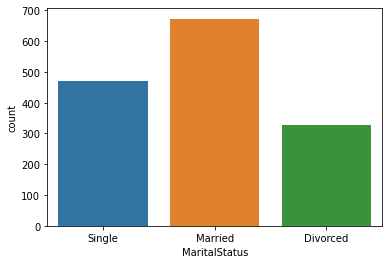

In [19]:
sns.countplot(x='MaritalStatus',data=dt)

<p>On constate qu'il y a plus d'employé marié que seul et divorcé</p>

<AxesSubplot:xlabel='OverTime', ylabel='count'>

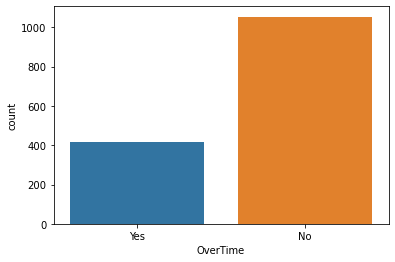

In [20]:
sns.countplot(x='OverTime',data=dt)

<p>On constate qu'il y a plus d'employé qui ne font pas des heurs supplement que ceux qui en font</p>

In [21]:
dt_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

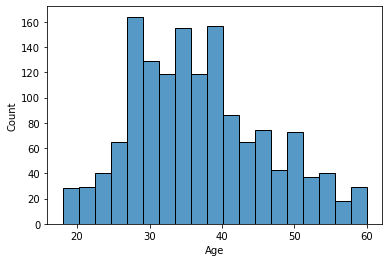

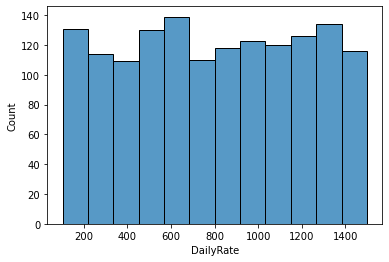

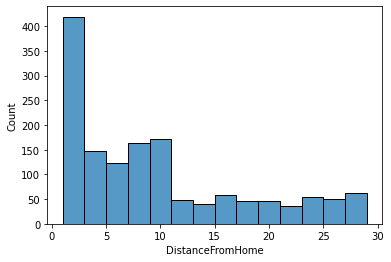

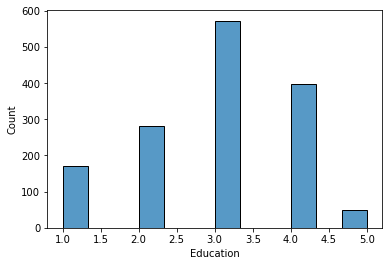

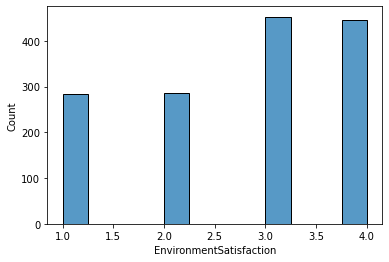

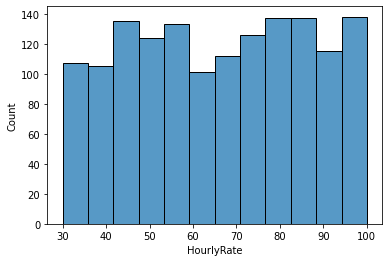

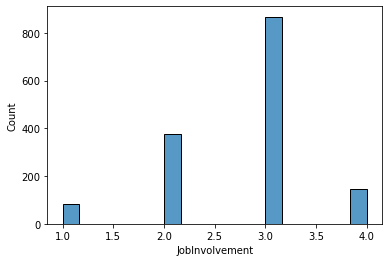

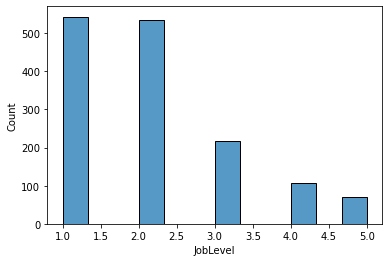

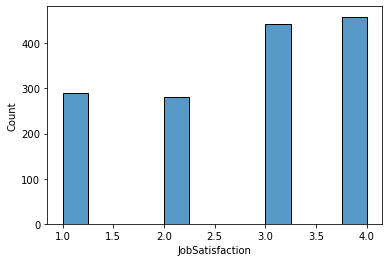

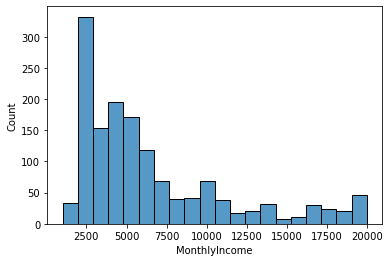

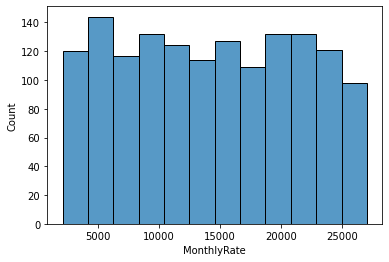

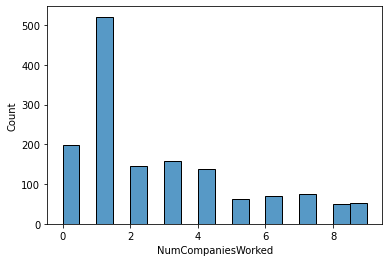

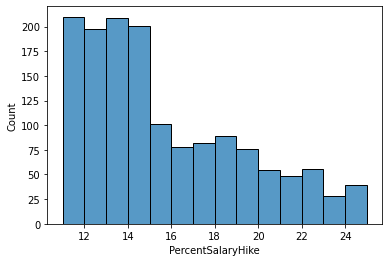

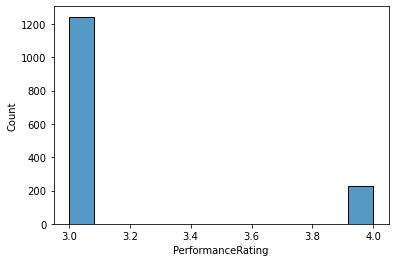

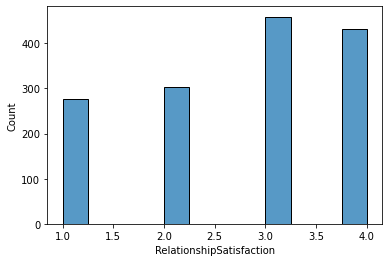

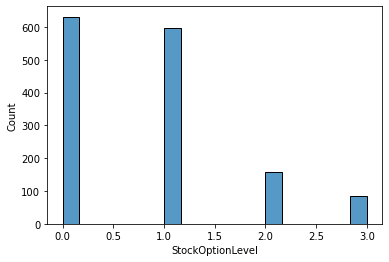

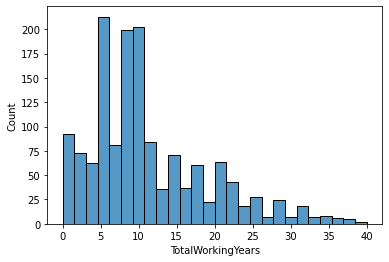

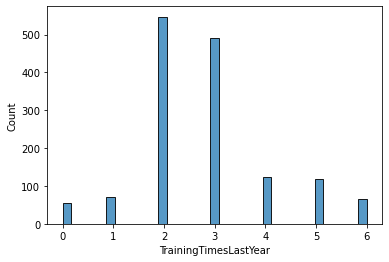

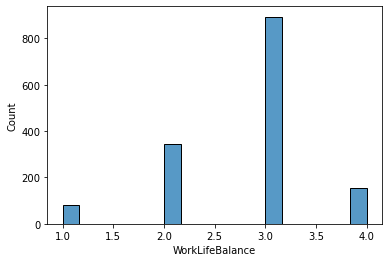

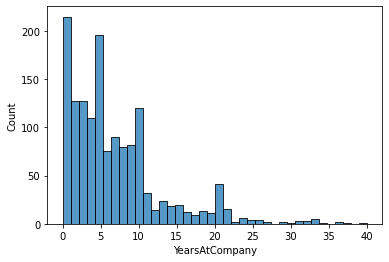

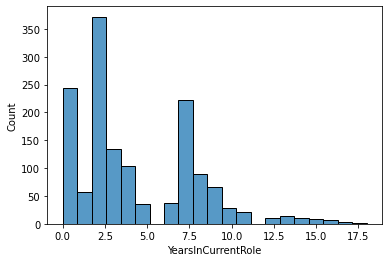

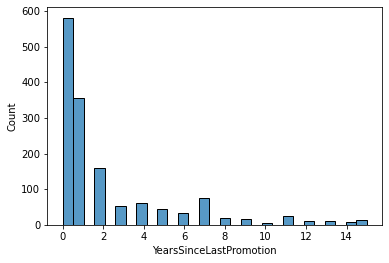

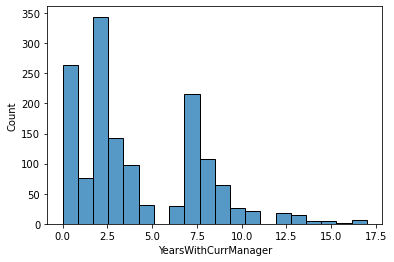

In [22]:
for i in dt_num :
    sns.histplot(dt[i])
    plt.show()

<p>
<strong>Age :</strong> On constate que il y a plus d'employé agé entre 28 et 40 ans. </br>
        
<strong>DailyRate:</strong> On constate qu'il y a plus d'employé qui ont un DailyRate de 600. </br>
    
<strong>DistanceFromHome :</strong> On constate qu'il y a plus d'employé dont la distance entre le travail et la maison est 2 </br>
    
<strong>Education:</strong> On constate qu'il y a plus d'employé qui on niveau d'etude 3 </br>
    
<strong>EnvironmentSatisfaction:</strong> On constate qu'il y a plus d'employé qui on niveau de satisfaction de  l'environnement de travail 3 </br>
    
<strong>HourlyRate:</strong> On constate qu'il y a plus d'employé dont le montant d’argent qui est payé pour chaque heure travaillée est 100 </br>
    
<strong>JobInvolvement:</strong> On constate qu'il y a plus d'emloyé dont le niveau d'implication dans le poste qu'il occupe est de 3 </br>

<strong>JobLevel :</strong> On constate qu'il y a plus d'emloyé dont le niveau de responsabilité et les attentes des rôles au sein de votre organisation est 1  </br>
    
<strong>JobSatisfaction :</strong> On constate qu'il y a plus d'emloyé dont le niveau satisfaction du job qu'il occupe est de 4 </br>
    
<strong>MonthlyIncome:</strong> On constate qu'il y a plus d'employé dont le revenu dénombrable brut reçu est de 2500. </br>
    
<strong>MonthlyRate  :</strong>On constate qu'il y a plus d'employé dont le montant des intérêts qui seraient facturés au cours d’un mois est de 5000 </br>
    
<strong>NumCompaniesWorked :</strong> On constate qu'il y a plus d'employé dont le nombre d'entreprise avec qui ils ont travaillé est de 1 </br>
     
<strong>PercentSalaryHike  :</strong> On constate qu'il y a plus d'employé dont l'Augmentation de salaire en pourcentage est de 11% </br>
    
<strong>PerformanceRating  :</strong>On constate qu'il y a plus d'employé dont l'évaluation des performances est 3 </br>
    
<strong>RelationshipSatisfaction :</strong> On constate qu'il y a plus d'employé dont la satisfaction des relations entre employé est de 3 </br>
    
<strong>StockOptionLevel :</strong>On constate qu'il y a plus d'employé dont le niveau des options d'achat d'actions est de 0.1
    
<strong>TotalWorkingYears:</strong>On constate qu'il y a plus d'employé dont le total des années de travail est de 5
    
<strong>TrainingTimesLastYear:</strong> On constate qu'il y a plus d'employé dont le Temps d'entraînement l'année dernière est de 2 </br>
    
<strong>WorkLifeBalance:</strong> On constate qu'il y a plus d'employé dont L'équilibre travail-vie est de 3 </br>
    
<strong>YearsAtCompany :</strong>  On constate qu'il y a plus d'employé dont les années faites dans l'entreprise est de 0 </br>
    
<strong>YearsInCurrentRole:</strong>  On constate qu'il y a plus d'employé dont les années dans le rôle actuel est de 2.5 </br>
    
<strong>YearsSinceLastPromotion:</strong>  On constate qu'il y a plus d'employé dont les années depuis la dernière promotion est de 0 </br>
    
<strong>YearsWithCurrManager:</strong>  On constate qu'il y a plus d'employé dont les Années avec le gestionnaire actuel est de 2.5 </br>

</p>

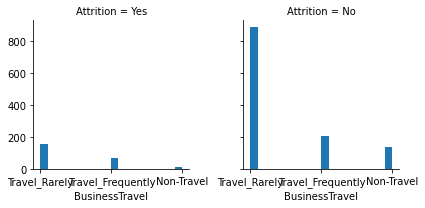

In [23]:
df_age_surv = sns.FacetGrid(dt,col="Attrition")
df_age_surv.map(plt.hist,'BusinessTravel',bins=20)


<p>On constate qu'il y a plus les employé ayant voyagé rarement qui non pas demissionné</p>

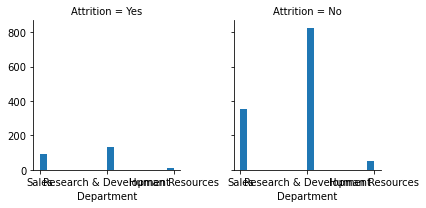

In [24]:
df_age_surv = sns.FacetGrid(dt,col="Attrition")
df_age_surv.map(plt.hist,'Department',bins=20)


<p>On constate qu'il y a plus les employé travaillant dans le departement de recherche et developpement qui non pas demissionné</p>

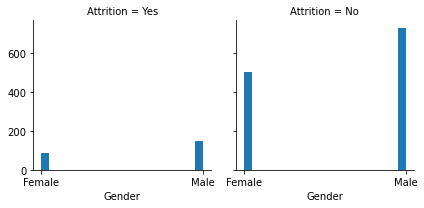

In [25]:
df_age_surv = sns.FacetGrid(dt,col="Attrition")
df_age_surv.map(plt.hist,'Gender',bins=20)

<p>On constate qu'il y a plus d'employé de sexe masculin qui n'ont pas demissioné</p>

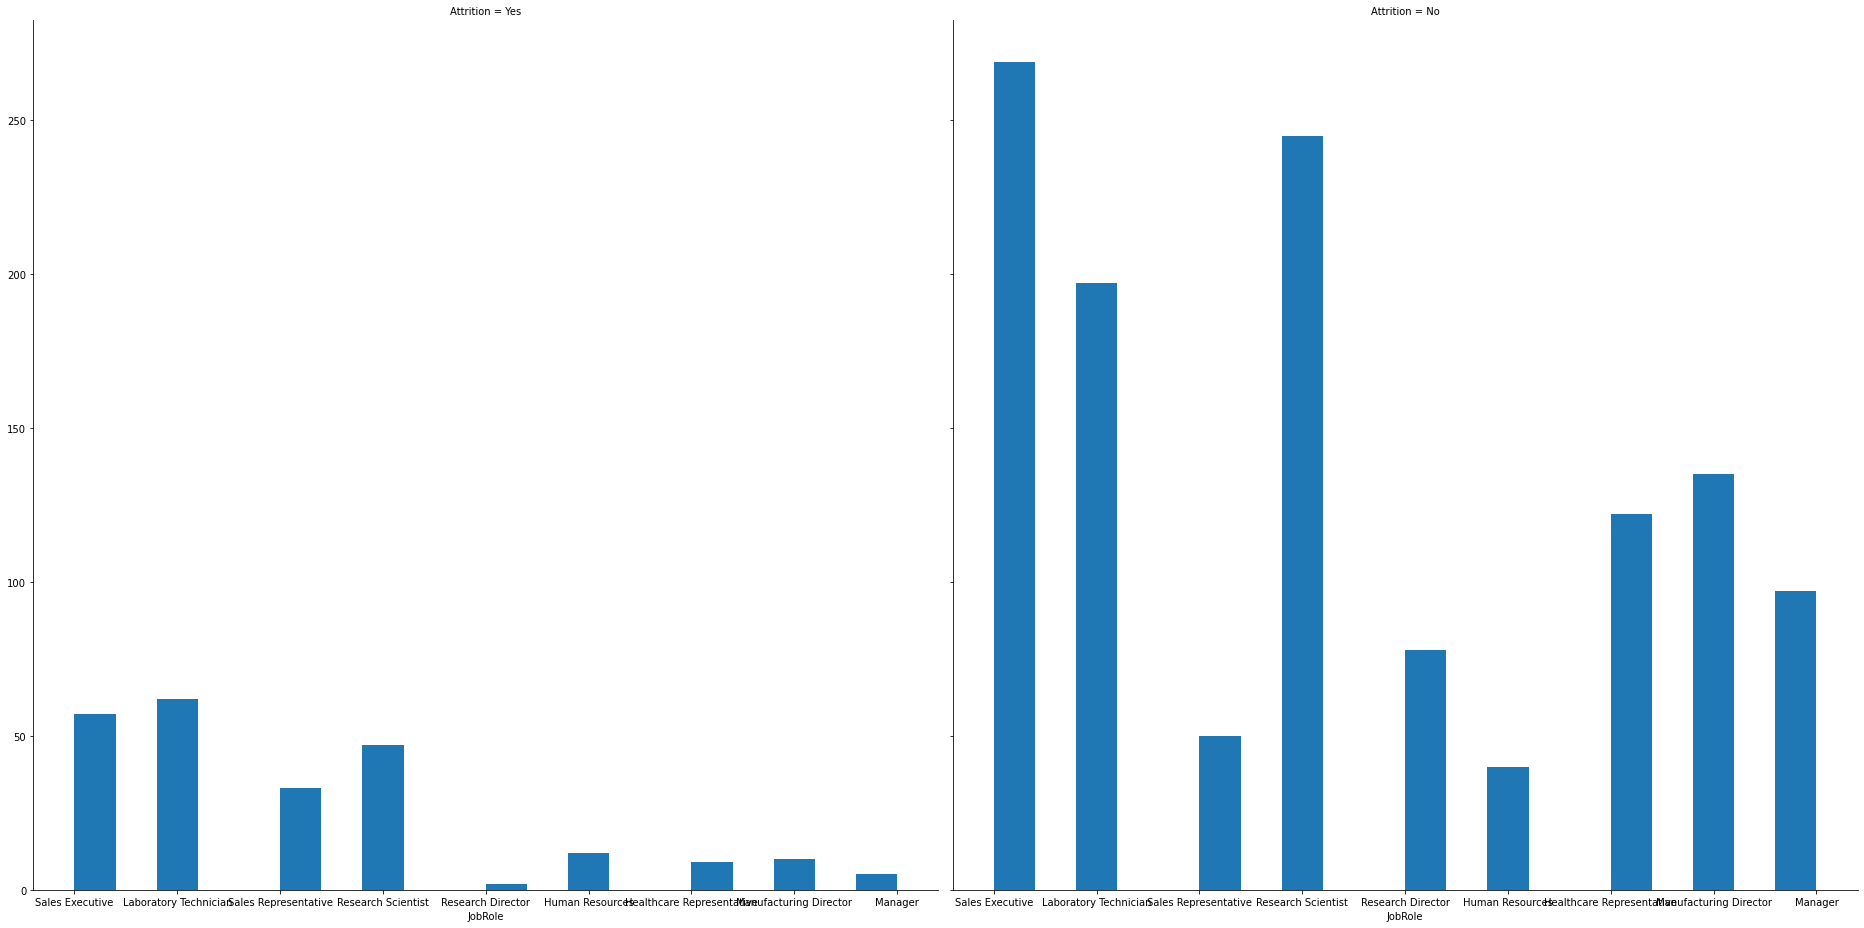

In [26]:
df_age_surv = sns.FacetGrid(dt,col="Attrition",height=13)
df_age_surv.map(plt.hist,'JobRole',bins=20)


<p>On constate qu'il y a plus d'employé ayant le role de sales executive qui n'ont pas demissioné</p>

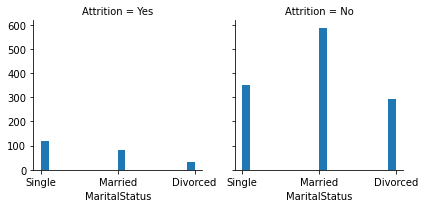

In [27]:
df_age_surv = sns.FacetGrid(dt,col="Attrition")
df_age_surv.map(plt.hist,'MaritalStatus',bins=20)

<p>On constate qu'il y a plus d'employé qui sont marié qui n'ont pas demissioné</p>

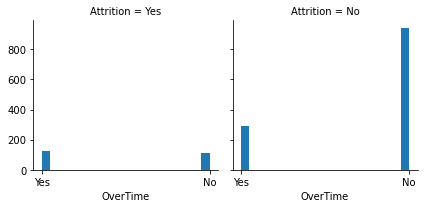

In [28]:
df_age_surv = sns.FacetGrid(dt,col="Attrition")
df_age_surv.map(plt.hist, 'OverTime',bins=20)

<p>On constate qu'il y a plus d'employé qui ne font pas d'heure suplementaire qui n'ont pas demissionné</p>

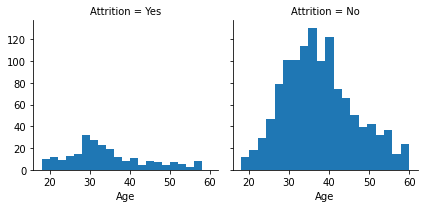

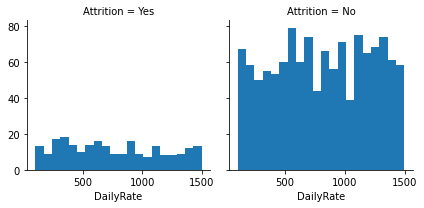

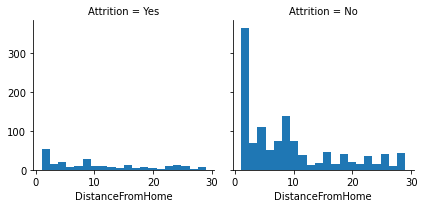

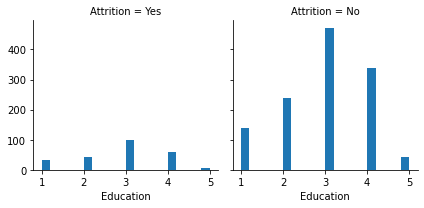

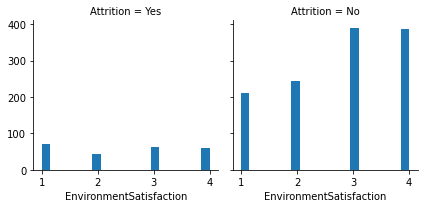

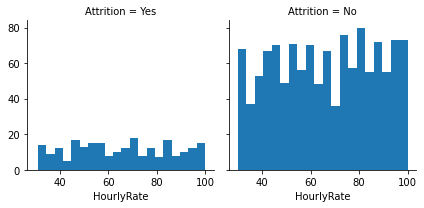

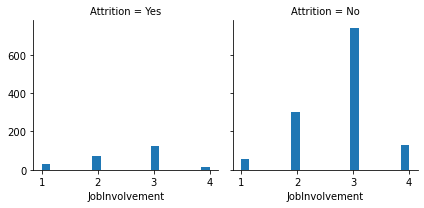

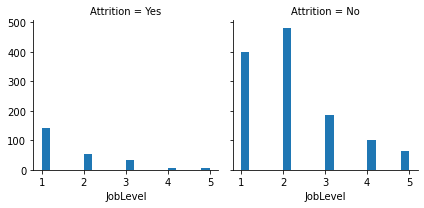

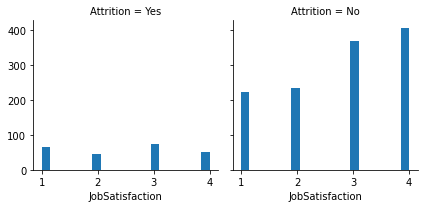

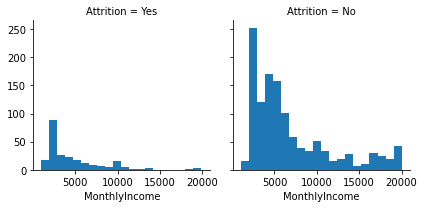

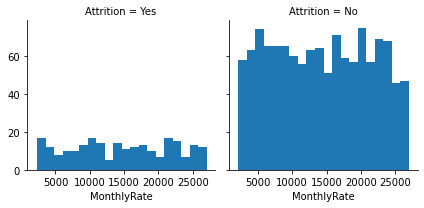

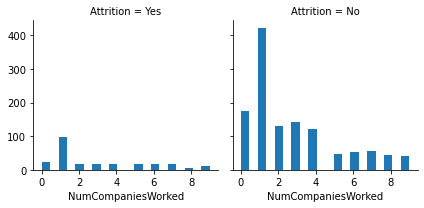

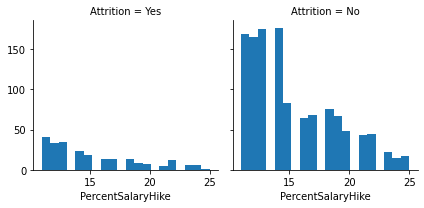

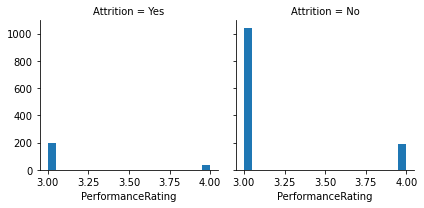

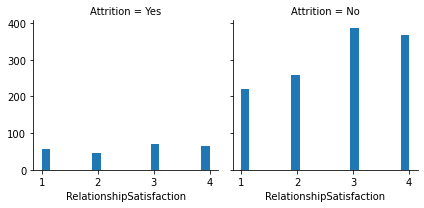

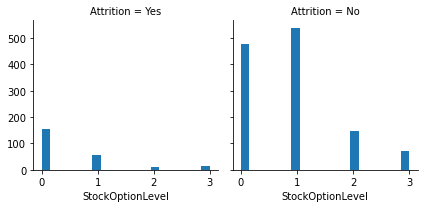

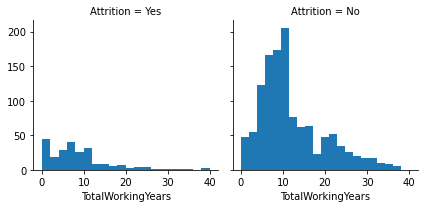

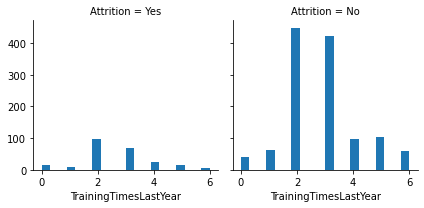

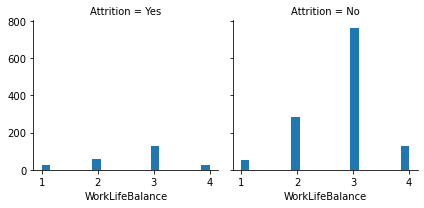

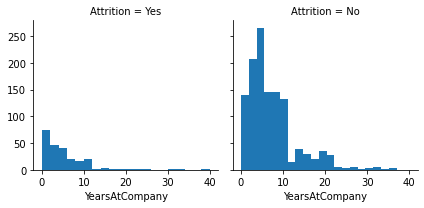

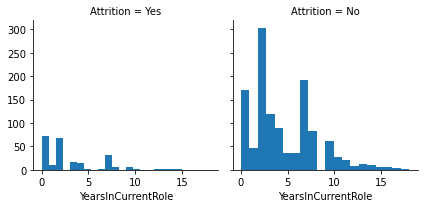

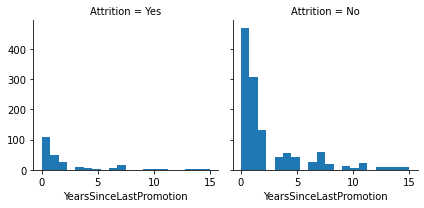

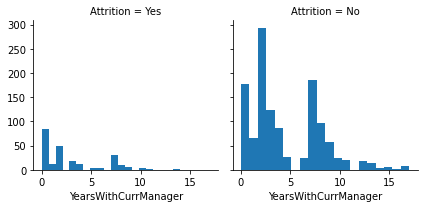

In [29]:
for i in dt_num :
    df_age_surv = sns.FacetGrid(dt,col="Attrition")
    df_age_surv.map(plt.hist,i,bins=20)

<p>
<strong>Age :</strong> On constate que il y a plus d'employé agé entre 32 et 40 ans qui n'ont pas demissionné</br>
        
<strong>DailyRate:</strong> On constate qu'il y a plus d'employé qui ont un DailyRate entre 500 et 700  qui n'ont pas demissionné</br>
    
<strong>DistanceFromHome :</strong> On constate qu'il y a plus d'employé dont la distance entre le travail et la maison est 2  qui n'ont pas demissionné</br>
    
<strong>Education:</strong> On constate qu'il y a plus d'employé qui on niveau d'etude 3  qui n'ont pas demissionné</br>
    
<strong>EnvironmentSatisfaction:</strong> On constate qu'il y a plus d'employé qui on niveau de satisfaction de  l'environnement de travail 3  qui n'ont pas demissionné</br>
    
<strong>HourlyRate:</strong> On constate qu'il y a plus d'employé dont le montant d’argent qui est payé pour chaque heure travaillée est de 80-90  qui n'ont pas demissionné</br>
    
<strong>JobInvolvement:</strong> On constate qu'il y a plus d'emloyé dont le niveau d'implication dans le poste qu'il occupe est de 3  qui n'ont pas demissionné</br>

<strong>JobLevel :</strong> On constate qu'il y a plus d'emloyé dont le niveau de responsabilité et les attentes des rôles au sein de votre organisation est 2  qui n'ont pas demissionné</br>
    
<strong>JobSatisfaction :</strong> On constate qu'il y a plus d'emloyé dont le niveau satisfaction du job qu'il occupe est de 4  qui n'ont pas demissionné</br>
    
<strong>MonthlyIncome:</strong> On constate qu'il y a plus d'employé dont le revenu dénombrable brut reçu est d'environs 2500  qui n'ont pas demissionné</br>
    
<strong>MonthlyRate  :</strong>On constate qu'il y a plus d'employé dont le montant des intérêts qui seraient facturés au cours d’un mois est de 5000  qui n'ont pas demissionné</br>
    
<strong>NumCompaniesWorked :</strong> On constate qu'il y a plus d'employé dont le nombre d'entreprise avec qui ils ont travaillé est de 1  qui n'ont pas demissionné</br>
     
<strong>PercentSalaryHike  :</strong> On constate qu'il y a plus d'employé dont l'Augmentation de salaire en pourcentage est de 14%  qui n'ont pas demissionné</br>
    
<strong>PerformanceRating  :</strong>On constate qu'il y a plus d'employé dont l'évaluation des performances est 3  qui n'ont pas demissionné</br>
    
<strong>RelationshipSatisfaction :</strong> On constate qu'il y a plus d'employé dont la satisfaction des relations entre employé est de 3  qui n'ont pas demissionné</br>
    
<strong>StockOptionLevel :</strong>On constate qu'il y a plus d'employé dont le niveau des options d'achat d'actions est de 1  qui n'ont pas demissionné</br>
    
<strong>TotalWorkingYears:</strong>On constate qu'il y a plus d'employé dont le total des années de travail est de 2  qui n'ont pas demissionné</br>
    
<strong>TrainingTimesLastYear:</strong> On constate qu'il y a plus d'employé dont le Temps d'entraînement l'année dernière est de 2  qui n'ont pas demissionné</br>
    
<strong>WorkLifeBalance:</strong> On constate qu'il y a plus d'employé dont L'équilibre travail-vie est de 3  qui n'ont pas demissionné</br>
    
<strong>YearsAtCompany :</strong>  On constate qu'il y a plus d'employé dont les années faites dans l'entreprise est de 5  qui n'ont pas demissionné</br>
    
<strong>YearsInCurrentRole:</strong>  On constate qu'il y a plus d'employé dont les années dans le rôle actuel est de 2.5  qui n'ont pas demissionné</br>
    
<strong>YearsSinceLastPromotion:</strong>  On constate qu'il y a plus d'employé dont les années depuis la dernière promotion est de 0  qui n'ont pas demissionné</br>
    
<strong>YearsWithCurrManager:</strong>  On constate qu'il y a plus d'employé dont les Années avec le gestionnaire actuel est de 2.5  qui n'ont pas demissionné</br>

</p>

<h1>ENCODAGE DES VARIABLE CATEGORIELLE</h1>

In [30]:
label_encoder = preprocessing.LabelEncoder()

In [31]:
features_to_encode = ['Attrition','BusinessTravel', 'Department', 'EducationField', 
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [32]:
for i in features_to_encode:
    dt[i] = label_encoder.fit_transform(dt[i])

In [33]:
dt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


<h1>VISUALISATION DE LA CORRELATION ENTRE LES DIFFERENTES VARIABLE</h1>

<h3>CORRELATION ENTRE VARIABLE CONTINUE</h3>

<AxesSubplot:>

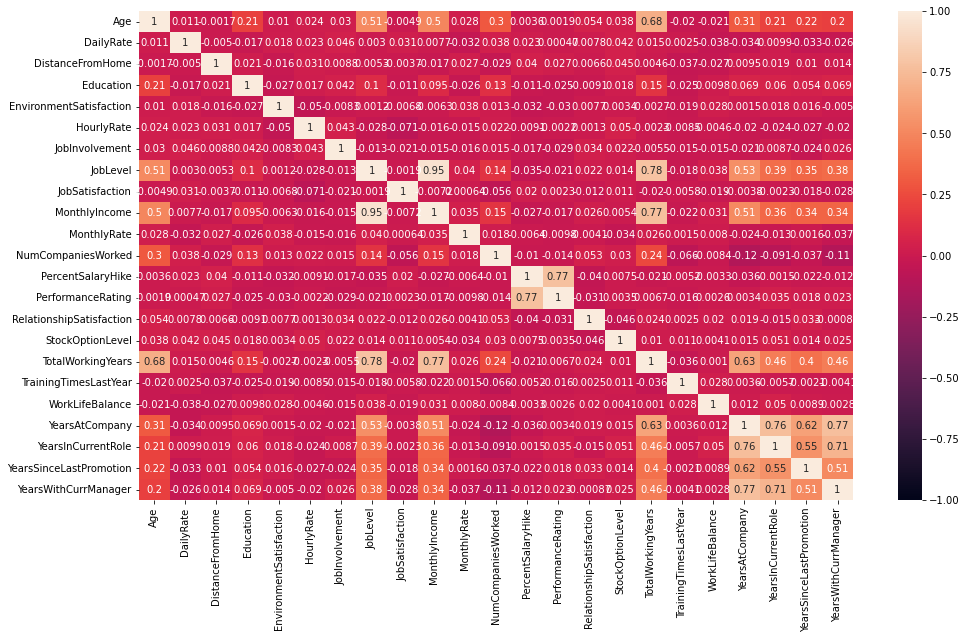

In [34]:
plt.figure(figsize=(16,9))
sns.heatmap(dt_num.corr(),vmin=-1,vmax=1,annot=True)

<p>On constate qu'il y a une forte correlation entre:
<ul>
<li>Age et jobLevel , Monthlyincome, numCompagnyWork, yearAtCompagny,jobLevel</li></br>
<li>jobLevel et Monthlyincome,totalworkingyears,yearAtCompagny, yearcurrentRole,yearLastPromotion,yearwithCurrManager</li></br>
<li>Monthlyincome et totalworkingyears,yearAtCompagny, yearcurrentRole,yearLastPromotion,yearwithCurrManager </li></br>
<li>performanceRating et percentSalaryHike </li></br>
<li>yearAtCompagnye et yearcurrentRole,yearLastPromotion,yearwithCurrManager</li></br>
</ul>
</p>

<h3>CORRELATION ENTRE VARIABLE CATEGORIELLE</h3>

In [35]:
dt_cat= dt[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']]
dt_cat.head()


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0


In [36]:
dt_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [37]:
for i in dt_cat :
    for j in dt_cat:
        if i != j:
            table = pd.crosstab(dt_cat[i],dt_cat[j])
            result = chi2_contingency(table)
            print("statistique de test:",result[0])
            print("p_valeur",result[1])
            print("degré de liberté",result[2])
            if result[1] < 0.05 :
                print("On constate ici que p_valeur est < 5% donc les variable",i,"et",j,"sont correlé")
                
            else :
                print("On constate ici que p_valeur est > 5% donc les variable",i,"et",j,"ne sont pas correlé")
                
                
            print("________________________________________________________________________________________")
        

statistique de test: 24.182413685655174
p_valeur 5.608614476449931e-06
degré de liberté 2
On constate ici que p_valeur est < 5% donc les variable Attrition et BusinessTravel sont correlé
________________________________________________________________________________________
statistique de test: 10.79600732241067
p_valeur 0.004525606574479633
degré de liberté 2
On constate ici que p_valeur est < 5% donc les variable Attrition et Department sont correlé
________________________________________________________________________________________
statistique de test: 16.024674119585423
p_valeur 0.006773980139025222
degré de liberté 5
On constate ici que p_valeur est < 5% donc les variable Attrition et EducationField sont correlé
________________________________________________________________________________________
statistique de test: 1.1169671241970975
p_valeur 0.29057244902890855
degré de liberté 1
On constate ici que p_valeur est > 5% donc les variable Attrition et Gender ne sont pas cor

statistique de test: 864.756197697534
p_valeur 1.7233012317259903e-155
degré de liberté 40
On constate ici que p_valeur est < 5% donc les variable JobRole et EducationField sont correlé
________________________________________________________________________________________
statistique de test: 16.029879046543474
p_valeur 0.04195444216198653
degré de liberté 8
On constate ici que p_valeur est < 5% donc les variable JobRole et Gender sont correlé
________________________________________________________________________________________
statistique de test: 26.91264729361271
p_valeur 0.042464326545470076
degré de liberté 16
On constate ici que p_valeur est < 5% donc les variable JobRole et MaritalStatus sont correlé
________________________________________________________________________________________
statistique de test: 6.568397455622728
p_valeur 0.5838313520634226
degré de liberté 8
On constate ici que p_valeur est > 5% donc les variable JobRole et OverTime ne sont pas correlé
_______

<p>Les variable correlé a notre target au niveau des variable categorielle sont :
    <ul>
     <li> BusinessTravel</li>
     <li> Department</li>
     <li> EducationField</li>
     <li> JobRole</li>
     <li>MaritalStatus</li>
    <li> OverTime</li>
    </ul>
</p>

<h3>CORRELATION ENTRE CONTINUE ET CATEGORIELLE</h3>

In [38]:
dt_visual = pd.concat([dt['Attrition'],dt_num],axis=1)
dt_visual.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,0,49,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,0,27,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [39]:
for i in dt_visual:
    result = statsmodels.formula.api.ols('{} ~ Attrition'.format(i), data=dt_visual).fit()
    table = statsmodels.api.stats.anova_lm(result)
    print(table)
    print("Visualisation de la correlation entre Attrition et",i)
    print("__________________________________________________________")

               df        sum_sq       mean_sq             F  PR(>F)
Attrition     1.0  1.987898e+02  1.987898e+02  2.754126e+33     0.0
Residual   1468.0  1.059586e-28  7.217891e-32           NaN     NaN
Visualisation de la correlation entre Attrition et Attrition
__________________________________________________________
               df         sum_sq      mean_sq          F        PR(>F)
Attrition     1.0    3107.333411  3107.333411  38.175887  8.356308e-10
Residual   1468.0  119488.133255    81.395186        NaN           NaN
Visualisation de la correlation entre Attrition et Age
__________________________________________________________
               df        sum_sq        mean_sq        F    PR(>F)
Attrition     1.0  7.676422e+05  767642.181285  4.72664  0.029858
Residual   1468.0  2.384143e+08  162407.589250      NaN       NaN
Visualisation de la correlation entre Attrition et DailyRate
__________________________________________________________
               df        sum_sq

<p>Les variable correlé a notre target au niveau des variable numerique sont
<ul>
<li>Age</li>
<li>DailyRate</li>
<li>DistanceFromHome</li>
<li>EnvironmentSatisfaction</li>
<li>JobInvolvement</li>
<li>JobSatisfaction</li>
<li>MonthlyIncome</li>
<li>stockOptionLevel</li>
<li>TotalWorkingYears</li>
<li>YearsAtCompany</li>
<li>YearsInCurrentRole</li>
<li>YearsWithCurrManager</li>
<li>WorkLifeBalance</li>
<li>TrainingTimesLastYear</li>


</ul>
</p>

<h1>APPLIQUONS LES DIFFERANTS MODEL DE ML</h1>

<h3>1-MODEL DE REGRESSION LOGISTIQUE</h3>


In [40]:
dt_targ=dt['Attrition']
dt_targ.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [41]:
dt_feat= dt[['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','MonthlyIncome','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','WorkLifeBalance','TrainingTimesLastYear','BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']]

In [42]:
dt_feat.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,WorkLifeBalance,TrainingTimesLastYear,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,3,4,5993,0,8,6,4,5,1,0,2,2,1,7,2,1
1,49,279,8,3,2,2,5130,1,10,10,7,7,3,3,1,1,1,6,1,0
2,37,1373,2,4,2,3,2090,0,7,0,0,0,3,3,2,1,4,2,2,1
3,33,1392,3,4,3,3,2909,0,8,8,7,0,3,3,1,1,1,6,1,1
4,27,591,2,1,3,2,3468,1,6,2,2,2,3,3,2,1,3,2,1,0


In [43]:
x_logis = dt_feat
y= dt_targ

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_logis,y,test_size=0.3,random_state=0) 

In [45]:
logreg = LogisticRegression() 
logreg = logreg.fit(x_train, y_train)  
   


In [46]:
y_pred  = logreg.predict(x_test) 

In [47]:
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.85


<p>On constate le model de regression logistique a un taux d'exactitude de 85%</p>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

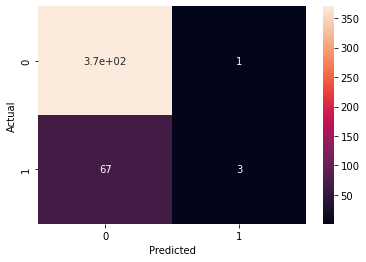

In [48]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

<p>
<ul>
<li><strong>TP:</strong>3.7e+02,donc l'ordinateur a predit que 3.7e+02 employé n'avais pas demissionné et effectivement il avait pas demissionné</li>
<li><strong>TN:</strong>3,donc l'ordinateur a predit que 0 employé avais demissionné et effectivement il avait 0 demissionné</li>
<li><strong>FP:</strong>1,donc l'ordinateur a predit que 1 employé avais demissionné mais il avait pas demissionné</li>
<li><strong>FN:</strong>67,donc l'ordinateur a predit que 70 n'avais pas demissionné mais il avait 70 qui avait demissionné</li>
</ul>
</p>

<h3>2-MODEL K-NEAREST-NEIGHBOR(KNN)</h3>

In [49]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.76
Accuracy for k= 2 is: 0.84
Accuracy for k= 3 is: 0.8
Accuracy for k= 4 is: 0.84
Accuracy for k= 5 is: 0.82
Accuracy for k= 6 is: 0.84
Accuracy for k= 7 is: 0.83
Accuracy for k= 8 is: 0.84
Accuracy for k= 9 is: 0.83
Accuracy for k= 10 is: 0.83
Accuracy for k= 11 is: 0.84
Accuracy for k= 12 is: 0.84
Accuracy for k= 13 is: 0.84
Accuracy for k= 14 is: 0.83
Accuracy for k= 15 is: 0.84
Accuracy for k= 16 is: 0.84
Accuracy for k= 17 is: 0.84
Accuracy for k= 18 is: 0.84
Accuracy for k= 19 is: 0.84
Accuracy for k= 20 is: 0.84
Accuracy for k= 21 is: 0.85
Accuracy for k= 22 is: 0.84
Accuracy for k= 23 is: 0.84
Accuracy for k= 24 is: 0.84
Accuracy for k= 25 is: 0.84
Accuracy for k= 26 is: 0.84
Accuracy for k= 27 is: 0.84
Accuracy for k= 28 is: 0.84
Accuracy for k= 29 is: 0.84


Text(0, 0.5, 'Testing Accuracy')

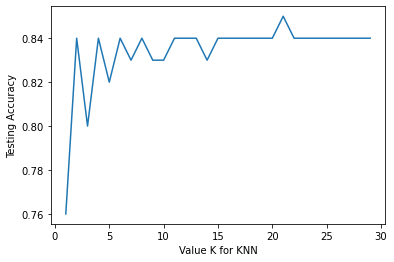

In [50]:
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

<p>On constate que le meilleur K a prend est 21</p>

In [51]:
knn=KNeighborsClassifier(n_neighbors=21) 
knn.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=21)

In [52]:
y_pred=knn.predict(x_test) 

In [53]:
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.8458049886621315


<p>On constate le model KNN a un taux d'exactitude de 84%</p>

<h3>3-MODEL Tree Prediction</h3>

<h3>Tree Pruning Code</h3>

In [54]:
dtree= tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)

In [55]:
dtree.fit(x_train, y_train)   


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [56]:
y_pred=dtree.predict(x_test)  

In [57]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8276643990929705


<p>On constate le model Tree pruning a un taux d'exactitude de 82%</p>

<h3>RANDOM FOREST</h3>

In [58]:
n_estima=30
scores=[]
for k in range(1,30):
    clf=RandomForestClassifier(n_estima) 
    clf.fit(x_train, y_train) 
    y_pred=clf.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.86
Accuracy for k= 2 is: 0.85
Accuracy for k= 3 is: 0.86
Accuracy for k= 4 is: 0.85
Accuracy for k= 5 is: 0.87
Accuracy for k= 6 is: 0.86
Accuracy for k= 7 is: 0.86
Accuracy for k= 8 is: 0.87
Accuracy for k= 9 is: 0.86
Accuracy for k= 10 is: 0.86
Accuracy for k= 11 is: 0.86
Accuracy for k= 12 is: 0.87
Accuracy for k= 13 is: 0.86
Accuracy for k= 14 is: 0.87
Accuracy for k= 15 is: 0.87
Accuracy for k= 16 is: 0.86
Accuracy for k= 17 is: 0.87
Accuracy for k= 18 is: 0.86
Accuracy for k= 19 is: 0.86
Accuracy for k= 20 is: 0.87
Accuracy for k= 21 is: 0.86
Accuracy for k= 22 is: 0.86
Accuracy for k= 23 is: 0.86
Accuracy for k= 24 is: 0.87
Accuracy for k= 25 is: 0.86
Accuracy for k= 26 is: 0.86
Accuracy for k= 27 is: 0.87
Accuracy for k= 28 is: 0.87
Accuracy for k= 29 is: 0.86


Text(0, 0.5, 'Testing Accuracy')

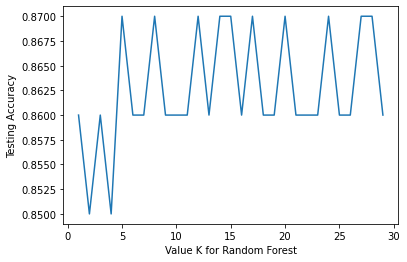

In [59]:
plt.plot(range(1,30),scores)
plt.xlabel('Value K for Random Forest')
plt.ylabel('Testing Accuracy')

<p>On constate que le meilleur K est 5</p>

In [62]:
clf=RandomForestClassifier(n_estimators=5) 
clf.fit(x_train, y_train)  


RandomForestClassifier(n_estimators=5)

In [63]:
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8503401360544217


<p>On constate le model random forest a un taux d'exactitude de 85%</p>

<h1>CONFIRMATION AVEC LE MODEL K-FOLD</h1>

In [64]:

from sklearn.model_selection import cross_val_score

In [65]:
score=cross_val_score(clf,dt_feat,dt_targ,cv=5)

In [66]:
print(scores)
print(sum(score)/5)

[0.86, 0.85, 0.86, 0.85, 0.87, 0.86, 0.86, 0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.87, 0.87, 0.86, 0.87, 0.86, 0.86, 0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.86, 0.87, 0.87, 0.86]
0.8414965986394558


<p>On constate que avec le model ramdom forest la meilleur performance est 0.87</p>

In [67]:
score=cross_val_score(dtree,dt_feat,dt_targ,cv=5)

In [68]:
print(scores)
print(sum(score)/5)

[0.86, 0.85, 0.86, 0.85, 0.87, 0.86, 0.86, 0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.87, 0.87, 0.86, 0.87, 0.86, 0.86, 0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.86, 0.87, 0.87, 0.86]
0.8408163265306122


<p>On constate que avec le model tree pruning la meilleur performance est 0.87</p>

In [69]:
score=cross_val_score(knn,dt_feat,dt_targ,cv=5)

In [70]:
print(scores)
print(sum(score)/5)

[0.86, 0.85, 0.86, 0.85, 0.87, 0.86, 0.86, 0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.87, 0.87, 0.86, 0.87, 0.86, 0.86, 0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.86, 0.87, 0.87, 0.86]
0.8367346938775511


<p>On constate que avec le model knn la meilleur performance est 87%</p>

In [71]:
score=cross_val_score(logreg,dt_feat,dt_targ,cv=5)

In [72]:
print(scores)
print(sum(score)/5)

[0.86, 0.85, 0.86, 0.85, 0.87, 0.86, 0.86, 0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.87, 0.87, 0.86, 0.87, 0.86, 0.86, 0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.86, 0.87, 0.87, 0.86]
0.84421768707483


<p>On constate que avec le model de regression logistique la meilleur performance est 87%</p>

<h1>CONCLUSION</h1>

<p>On constate que les differents models ont a peut près les même performance au niveau des prediction.
Donc le model a prend parmis ces differents model est Radom forest car contraitement au autre model il est très facile de mesurer l'importance de chaque caractéristique sur la prédiction et il a pas de probleme de overfit</p>

<h1>TEST AVEC D'AUTRE VALEUR</h1>

In [73]:
nom_champ = ["Age","DailyRate","DistanceFromHome","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","MonthlyIncome","stockOptionLevel","TotalWorkingYears","YearsAtCompany","YearsInCurrentRole","YearsWithCurrManager","WorkLifeBalance","TrainingTimesLastYear","BusinessTravel","Department","EducationField","JobRole","MaritalStatus","OverTime"]

In [74]:
data=[]

In [75]:
for i in nom_champ:
    print("Veillez entre le",i,"de l'employé")
    p=input()
    data.append(p)
data=np.array(data).reshape(1,-1)


Veillez entre le Age de l'employé
18
Veillez entre le DailyRate de l'employé
20
Veillez entre le DistanceFromHome de l'employé
300
Veillez entre le EnvironmentSatisfaction de l'employé
1
Veillez entre le JobInvolvement de l'employé
2
Veillez entre le JobSatisfaction de l'employé
1
Veillez entre le MonthlyIncome de l'employé
1
Veillez entre le stockOptionLevel de l'employé
1
Veillez entre le TotalWorkingYears de l'employé
1
Veillez entre le YearsAtCompany de l'employé
1
Veillez entre le YearsInCurrentRole de l'employé
1
Veillez entre le YearsWithCurrManager de l'employé
1
Veillez entre le WorkLifeBalance de l'employé
1
Veillez entre le TrainingTimesLastYear de l'employé
1
Veillez entre le BusinessTravel de l'employé
1
Veillez entre le Department de l'employé
1
Veillez entre le EducationField de l'employé
1
Veillez entre le JobRole de l'employé
1
Veillez entre le MaritalStatus de l'employé
1
Veillez entre le OverTime de l'employé
1


In [76]:
y_pred=clf.predict(data)

In [77]:
y_pred

array([0])